# Notebook to Render Plots for RA 2: Test Optimization
_Optimization of Automated and Manual Software Tests in Industrial Practice_

**Usage**: Run all cells of this notebook to reproduce the plots for RA 2. The plots will be stored as pdf files next to this notebook.

In [131]:
!pip3 install pandas numpy matplotlib openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [132]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
from typing import Dict
%matplotlib inline
plt.style.use('default')
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from itertools import islice

## Plotting utilities

In [133]:
import textwrap
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D


def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    if color.startswith('#'):
        color = color[1:]
    c = tuple([float(int(color[i:i + 2], 16)) /
              255 for i in range(0, len(color), 2)])
    c = colorsys.rgb_to_hls(c[0], c[1], c[2])
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

primary_color = "#5c96a5"
primary_colors = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00"]
secondary_colors = [adjust_lightness(color, amount=0.5)
                    for color in primary_colors]
tertiary_colors = [adjust_lightness(color, amount=1.5)
                   for color in primary_colors]
primary_colors_rgb = [adjust_lightness(color, amount=1.0) for color in primary_colors]
gray_color = "#f6f6f6"
orange_color = "#FD7B34"
blue_color ="#2A586F"
labelsize = 24
ticksize = 22
barlabelsize = 14
linewidth = 2.5
markersize = 8
bar_width = 0.7
box_width = 0.5
boxplot_figsize = (2, 6)


### double bar

In [134]:
def double_barchart(y: Dict,
                    labels,
                    output_path: str,
                    colors: Dict,
                    ylabel: str = "Mentions",
                    percentage_values: bool = False,
                    legend_position: str = "best",
                    yscale: str = "linear"):
    x = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bars
    multiplier = 0


    f, ax = plt.subplots(layout='constrained')

    for attribute, measurement in y.items():
      offset = width * multiplier
      rects = ax.bar(x + offset - width/2, measurement, width, label=attribute, facecolor=colors[attribute])
      multiplier += 1

    
    ax.grid(axis='y', which='both')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_yscale(yscale)
    ax.set_axisbelow(True)
    
    ax.xaxis.set_tick_params(labelsize=ticksize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    
    if percentage_values:
       ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0,decimals=0))
    
    plt.ylabel(ylabel, fontsize=labelsize)
       
    plt.xticks(range(len(labels)), [textwrap.fill(label, 16) for label in labels], rotation=0)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.legend(loc=legend_position, prop={'size': labelsize})

    f.savefig(output_path)
    plt.show()

### stacked bar

In [135]:
def simple_stacked_barchart(labels: list[str],
                            y1: list[float],
                            y2: list[float],
                            y3: list[float],
                            output_path: str,
                            ylabel: str = "Mentions",
                            percentage_values: bool = False):
    f, ax = plt.subplots(figsize=(12, 3))

    ax.bar(labels, y1, color=secondary_colors, width=bar_width)
    ax.bar(labels, [val2 - val1 for val1, val2 in zip(y1, y2)], bottom=y1, color=primary_colors, width=bar_width)
    ax.bar(labels, [val2 - val1 for val1, val2 in zip(y2, y3)], bottom=y2, color=tertiary_colors, width=bar_width)

    ax.grid(axis='y', which='both')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_axisbelow(True)

    ax.xaxis.set_tick_params(labelsize=ticksize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    plt.yticks(np.arange(0, 1.01, 0.5))

    if percentage_values:
        ax.yaxis.set_major_formatter(
            mtick.PercentFormatter(xmax=1.0, decimals=0))

    plt.ylabel(ylabel, fontsize=labelsize)

    plt.xticks(range(len(labels)), [textwrap.fill(label, 16) for label in labels],
               rotation=0)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Put a legend to the right of the current axis
    category_failures = mlines.Line2D([], [], marker='None', linestyle='None', label = 'Failure Types')
    category_new_failures = mpatches.Patch(facecolor=adjust_lightness(mpl.colors.to_hex('dimgrey'), amount=0.5), label = 'New failures')
    category_all_failures = mpatches.Patch(facecolor=adjust_lightness(mpl.colors.to_hex('dimgrey'), amount=1), label = 'All failures')
    category_build_failures = mpatches.Patch(facecolor=adjust_lightness(mpl.colors.to_hex('dimgrey'), amount=1.5), label = 'Build failures')
    
    ax.legend(handles=[category_build_failures,category_all_failures,category_new_failures],
              loc='center left', bbox_to_anchor=(1.04, 0.5), prop={'size': labelsize})

    f.tight_layout(pad=0.0)
    f.savefig(output_path)
    plt.show()


### multi line

In [136]:
def multi_line(time_new, bvk_new, dolby_new,
    time, bvk, dolby, ilp, zeiss,
    time_build, bvk_build, dolby_build, ilp_build, zeiss_build,
    output_path: str, ylabel: str = "Amount") -> None:
    
    f, ax = plt.subplots(2,3,figsize=(12, 7), sharey = True)

    labelsize = 25
    ticksize = 18
    linewidth = 4
    markersize = 6

    f.text(0.5, 0.02, 'Cost Limit $L$', ha='center', size=labelsize)
    f.text(0.04, 0.5, 'Fault Detection Rate', va='center', rotation='vertical', size=labelsize)

    ax[0, 0].set_title("Time",{'fontsize': labelsize})
    time_plot, = ax[0, 0].plot(time['x'], time['y'], color=primary_colors_rgb[0], label="Time", linewidth=linewidth)
    ax[0, 0].plot(time_build['x'], time_build['y'],
            color=tertiary_colors[0], linestyle='dotted', linewidth=linewidth)
    ax[0, 0].plot(0.25, 0.6444444444444445, marker="o", markersize=15, markeredgewidth=2, markeredgecolor=primary_colors_rgb[0], markerfacecolor='None')

    ax[0, 1].set_title("BVK",{'fontsize': labelsize})
    ax[0, 1].plot(bvk_new['x'], bvk_new['y'],
            color=secondary_colors[1], linestyle='dashed', linewidth=linewidth)
    bvk_plot, = ax[0, 1].plot(bvk['x'], bvk['y'], color=primary_colors_rgb[1], label='BVK', linewidth=linewidth)
    ax[0, 1].plot(0.5, 0.53, marker="o", markersize=15, markeredgewidth=2, markeredgecolor=primary_colors_rgb[1], markerfacecolor='None')
    ax[0, 1].plot(bvk_build['x'], bvk_build['y'],
            color=tertiary_colors[1], linestyle='dotted', linewidth=linewidth)
    
    ax[0, 2].set_title("Dolby",{'fontsize': labelsize})
    ax[0, 2].plot(dolby_new['x'], dolby_new['y'],
            color=secondary_colors[2], linestyle='dashed', linewidth=linewidth)
    dolby_plot, = ax[0, 2].plot(dolby['x'], dolby['y'], color=primary_colors_rgb[2], label='Dolby', linewidth=linewidth)
    ax[0,2].plot(0.03, 0.9705882352941176, marker="o", markersize=15, markeredgewidth=2, markeredgecolor=primary_colors_rgb[2], markerfacecolor='None')
    ax[0, 2].plot(dolby_build['x'], dolby_build['y'],
            color=tertiary_colors[2], linestyle='dotted', linewidth=linewidth)

    ax[1, 0].set_title("ILP",{'fontsize': labelsize})
    ilp_plot, = ax[1, 0].plot(ilp['x'], ilp['y'], color=primary_colors_rgb[3], label='ILP', linewidth=linewidth)
    ax[1,0].plot(0.15, 0.5882352941176471, marker="o", markersize=15, markeredgewidth=2, markeredgecolor=primary_colors_rgb[3], markerfacecolor='None')
    ax[1, 0].plot(ilp_build['x'], ilp_build['y'],
            color=tertiary_colors[3], linestyle='dotted', linewidth=linewidth)
    
    ax[1, 1].set_title("Zeiss",{'fontsize': labelsize})
    zeiss_plot, = ax[1, 1].plot(zeiss['x'], zeiss['y'], color=primary_colors_rgb[4], label='Zeiss', linewidth=linewidth)
    ax[1, 1].plot(0.30, 0.612, marker="o", markersize=15, markeredgewidth=2, markeredgecolor=primary_colors_rgb[4], markerfacecolor='None')
    ax[1, 1].plot(zeiss_build['x'], zeiss_build['y'],
            color=tertiary_colors[4], linestyle='dotted', linewidth=linewidth)
    
    ax[1, 2].set_visible(False)

    category_failures = mlines.Line2D([], [], marker='None', linestyle='None', linewidth=linewidth, label = 'Failure Types')
    category_new_failures = mlines.Line2D(time_new['x'], time_new['y'], color='k', linestyle='dashed', linewidth=linewidth, label = 'New failures')
    category_all_failures = mlines.Line2D(time_new['x'], time_new['y'], color='k', linewidth=linewidth, label = 'All failures')
    category_build_failures = mlines.Line2D(time_new['x'], time_new['y'], color='k', linestyle='dotted', linewidth=linewidth, label = 'Build failures')
    category_pareto_optimal = mlines.Line2D([],[], linestyle='None',marker='o', markersize=15, markeredgewidth=2, markeredgecolor='k', markerfacecolor='None', label = '$L_o$')
    blank = mpatches.Patch(visible=False)

    category_subjects = mlines.Line2D([], [], marker='None', linestyle='None', label = 'Subjects')
    

    f.legend(handles=[category_build_failures,category_all_failures,category_new_failures,category_pareto_optimal],
              loc="lower right", ncol=1, prop={'size': labelsize})
    
    for (m,n), subplot in np.ndenumerate(ax):
        ax[m, n].grid(axis='y', which='both')
        ax[m, n].set_axisbelow(True)

        ax[m, n].xaxis.set_tick_params(direction='in', labelsize=ticksize)
        ax[m, n].yaxis.set_tick_params(labelsize=ticksize)

        ax[m, n].spines['right'].set_visible(False)
        ax[m, n].spines['top'].set_visible(False)

        ax[m, n].xaxis.set_major_formatter(
            mtick.PercentFormatter(xmax=1.0, decimals=0))
        ax[m, n].yaxis.set_major_formatter(
            mtick.PercentFormatter(xmax=1.0, decimals=0))
        
        ax[m, n].set_aspect('equal', adjustable='box')

    ax[1, 0].get_shared_x_axes().join(ax[1,0], ax[0,0])
    ax[0, 0].set_xticklabels([])
    ax[1, 1].get_shared_x_axes().join(ax[1,1], ax[0,1])
    ax[0, 1].set_xticklabels([])

    f.savefig(output_path,
              pad_inches=0.00,
              bbox_inches="tight")
    plt.show()


## RA2

### RQ2.1 Fault Revelation

#### TIA

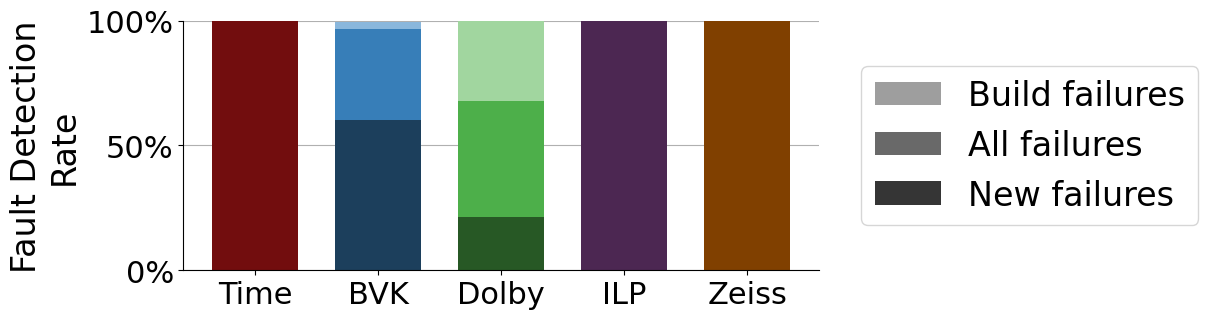

In [137]:
# Automated and Manual Testing Fault detection rate
labels = [
    "Time",
    "BVK",
    "Dolby",
    "ILP", 
    "Zeiss"
]

# Fault revelation for new test failures
y1 = [
    1.0,
    0.6,
    0.2142857143,
    1.0,
    1.0
]
# Overall fault revelation
y2 = [
    1.0,
    0.964,
    0.676,
    1.0,
    1.0
]
# Failing build revelation
y3 = [
    1.0,
    0.992,
    1,
    1.0,
    1.0
]


simple_stacked_barchart(labels, y1, y2, y3, "rq2-1-tia-automated-all.pdf", "Fault Detection\nRate", True)

#### Pareto

/var/folders/86/86pqxyrj7rjbqd6yyy7qlzj00000gn/T/ipykernel_96559/3271577694.py:82: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax[1, 0].get_shared_x_axes().join(ax[1,0], ax[0,0])
/var/folders/86/86pqxyrj7rjbqd6yyy7qlzj00000gn/T/ipykernel_96559/3271577694.py:84: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax[1, 1].get_shared_x_axes().join(ax[1,1], ax[0,1])


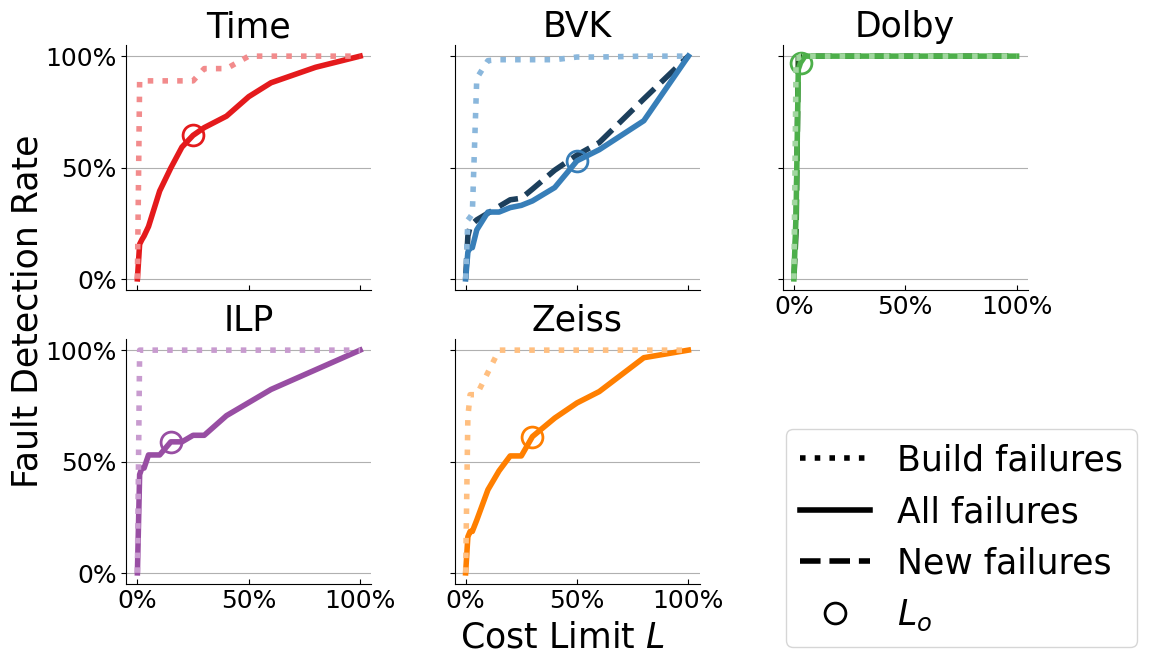

In [138]:
# Pareto

# Time new - Not used since we only have 2 uploads.
time_new = pd.DataFrame([
    [0, 0],
    [0.01, 0.116],
    [0.02, 0.1546875],
    [0.03, 0.18547140649149924],
    [0.05, 0.23511450381679388],
    [0.10, 0.3945480631276901],
    [0.15, 0.497907949790795],
    [0.20, 0.5916442048517521],
    [0.25, 0.6444444444444445],
    [0.30, 0.6790281329923273],
    [0.40, 0.7214723926380369],
    [0.50, 0.7759237187127532],
    [0.60, 0.8323699421965318],
    [0.80, 0.9304152637485971],
    [1,1]
], columns=['x', 'y'])
# Time all
time = pd.DataFrame([
    [0, 0],
    [0.01, 0.15562403697996918],
    [0.02, 0.17565485362095531],
    [0.03, 0.1926040061633282],
    [0.05, 0.23511450381679388],
    [0.10, 0.3945480631276901],
    [0.15, 0.497907949790795],
    [0.20, 0.5916442048517521],
    [0.25, 0.6444444444444445], # L_o
    [0.30, 0.6790281329923273],
    [0.40, 0.7305555555555555],
    [0.50, 0.8180555555555555],
    [0.60, 0.8805555555555555],
    [0.80, 0.95],
    [1,1]
], columns=['x', 'y'])
# Time build
time_build = pd.DataFrame([
    [0, 0],
    [0.01, 0.889],
    [0.02, 0.889],
    [0.03, 0.889],
    [0.05, 0.889],
    [0.10, 0.889],
    [0.15, 0.889],
    [0.20, 0.889],
    [0.25, 0.889],
    [0.30, 0.944],
    [0.40, 0.944],
    [0.50, 1],
    [0.60, 1],
    [0.80, 1],
    [1,1]
], columns=['x', 'y'])
# BVK new
bvk_new = pd.DataFrame([
    [0, 0],
    [0.01, 0.192],
    [0.02, 0.234],
    [0.03, 0.247],
    [0.05, 0.265],
    [0.10, 0.295],
    [0.15, 0.325],
    [0.20, 0.355],
    [0.25, 0.362],
    [0.30, 0.403],
    [0.40, 0.488],
    [0.50, 0.556],
    [0.60, 0.612],
    [0.80, 0.808],
    [1, 1]
], columns=['x', 'y'])
# BVK all
bvk = pd.DataFrame([
    [0, 0],
    [0.01, 0.12],
    [0.02, 0.14],
    [0.03, 0.14],
    [0.05, 0.22],
    [0.10, 0.30],
    [0.15, 0.30],
    [0.20, 0.32],
    [0.25, 0.33],
    [0.30, 0.35],
    [0.40, 0.41],
    [0.50, 0.53], # L_o
    [0.60, 0.58],
    [0.80, 0.71],
    [1, 1]
], columns=['x', 'y'])
# BVK build
bvk_build = pd.DataFrame([
    [0, 0],
    [0.01, 0.264],
    [0.02, 0.277],
    [0.03, 0.292],
    [0.05, 0.901],
    [0.10, 0.980],
    [0.15, 0.984],
    [0.20, 0.984],
    [0.25, 0.984],
    [0.30, 0.984],
    [0.40, 0.984],
    [0.50, 0.996],
    [0.60, 0.996],
    [0.80, 1],
    [1, 1]
], columns=['x', 'y'])
# DOLBY new
dolby_new = pd.DataFrame([
    [0, 0],
    [0.01, 0.214],
    [0.02, 1],
    [0.03, 1],
    [0.05, 1], 
    [0.10, 1], 
    [0.15, 1], 
    [0.20, 1], 
    [0.25, 1], 
    [0.30, 1], 
    [0.40, 1], 
    [0.50, 1], 
    [0.60, 1], 
    [0.80, 1],
    [1, 1]
], columns=['x', 'y'])
# DOLBY all
dolby = pd.DataFrame([
    [0, 0],
    [0.01, 0.29411764705882354],
    [0.02, 0.9411764705882353],
    [0.03, 0.9705882352941176], # L_o
    [0.05, 1],
    [0.10, 1],
    [0.15, 1],
    [0.20, 1],
    [0.25, 1],
    [0.30, 1],
    [0.40, 1],
    [0.50, 1],
    [0.60, 1],
    [0.80, 1],
    [1, 1]
], columns=['x', 'y'])
# Dolby build
dolby_build = pd.DataFrame([
    [0, 0],
    [0.01, 0.991],
    [0.02, 0.991],
    [0.03, 1],
    [0.05, 1],
    [0.10, 1],
    [0.15, 1],
    [0.20, 1],
    [0.25, 1],
    [0.30, 1],
    [0.40, 1],
    [0.50, 1],
    [0.60, 1],
    [0.80, 1],
    [1, 1]
], columns=['x', 'y'])
# ILP all
ilp = pd.DataFrame([
    [0, 0],
    [0.01, 0.4411764705882353],
    [0.02, 0.47058823529411764],
    [0.03, 0.47058823529411764],
    [0.05, 0.5294117647058824],
    [0.10, 0.5294117647058824],
    [0.15, 0.5882352941176471], # L_o
    [0.20, 0.5882352941176471],
    [0.25, 0.6176470588235294],
    [0.30, 0.6176470588235294],
    [0.40, 0.7058823529411765],
    [0.50, 0.7647058823529411],
    [0.60, 0.8235294117647058],
    [0.80, 0.9117647058823529],
    [1, 1]
], columns=['x', 'y'])
# ILP build
ilp_build = pd.DataFrame([
    [0, 0],
    [0.01, 1],
    [0.02, 1],
    [0.03, 1],
    [0.05, 1],
    [0.10, 1],
    [0.15, 1],
    [0.20, 1],
    [0.25, 1],
    [0.30, 1],
    [0.40, 1],
    [0.50, 1],
    [0.60, 1],
    [0.80, 1],
    [1, 1]
], columns=['x', 'y'])
# ZEISS new
zeiss_new = pd.DataFrame([
    [0, 0],
    [0.01, 0.01],
    [0.02, 0.03],
    [0.03, 0.07],
    [0.05, 0.1],
    [0.10, 0.2],
    [0.15, 0.4],
    [0.20, 0.6],
    [0.25, 0.8],
    [0.30, 0.99],
    [0.40, 0.99],
    [0.50, 0.99],
    [0.60, 0.99],
    [0.80, 0.99],
    [1, 1]
], columns=['x', 'y'])
# ZEISS all
zeiss = pd.DataFrame([
    [0, 0],
    [0.01, 0.162],
    [0.02, 0.186],
    [0.03, 0.186],
    [0.05, 0.237],
    [0.10, 0.373],
    [0.15, 0.458],
    [0.20, 0.525],
    [0.25, 0.525], # L_o
    [0.30, 0.612],
    [0.40, 0.695],
    [0.50, 0.763],
    [0.60, 0.814],
    [0.80, 0.966],
    [1, 1]
], columns=['x', 'y'])
# ZEISS build
zeiss_build = pd.DataFrame([
    [0, 0],
    [0.01, 0.7],
    [0.02, 0.8],
    [0.03, 0.8],
    [0.05, 0.8],
    [0.10, 0.9],
    [0.15, 1],
    [0.20, 1],
    [0.25, 1],
    [0.30, 1],
    [0.40, 1],
    [0.50, 1],
    [0.60, 1],
    [0.80, 1],
    [1, 1]
], columns=['x', 'y'])


multi_line(time_new, bvk_new, dolby_new,
           time, bvk, dolby, ilp, zeiss,
           time_build, bvk_build, dolby_build, ilp_build, zeiss_build, "rq2-1-pareto-limits-automated.pdf", "Fault Det.")


### RQ2.3 Cost-Benefit

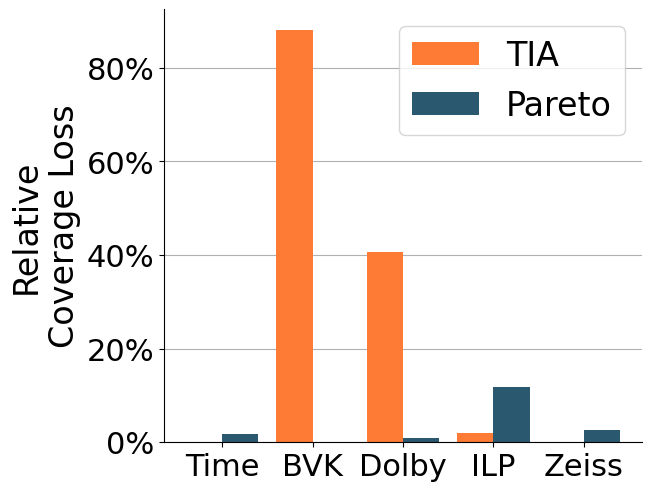

In [139]:
# Automated Testing Coverage Retention
labels = ("Time", "BVK", "Dolby", "ILP", "Zeiss")

coverage_loss = { 
    'TIA': (0.0, 0.881, 0.407, 0.019, 0.0),
    'Pareto': (0.018, 0.0, 0.009, 0.119, 0.027)
}

colors = {
    'TIA': orange_color,
    'Pareto': blue_color
}

double_barchart(coverage_loss, labels, "rq2-3-coverage-loss-all.pdf", colors, "Relative\nCoverage Loss", True)

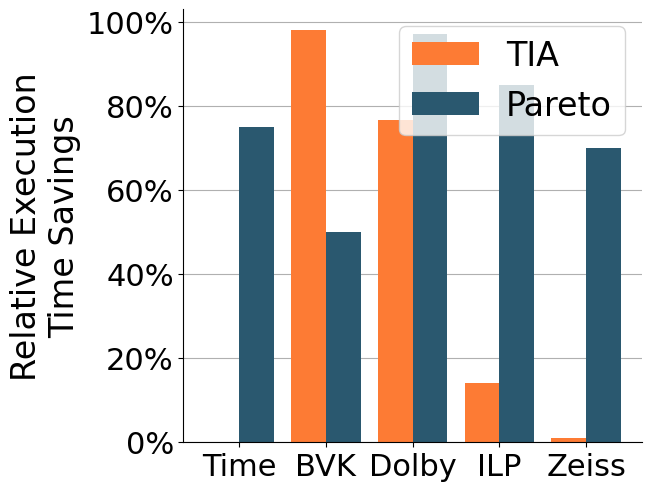

In [140]:
labels = ("Time", "BVK", "Dolby", "ILP", "Zeiss")

relative_savings = {
    'TIA': (0.0, 0.98, 0.765, 0.14, 0.01),
    'Pareto': (0.75, 0.5, 0.97, 0.85, 0.70)
}

colors = {
    'TIA': orange_color,
    'Pareto': blue_color
}

double_barchart(relative_savings, labels, "rq2-3-relative-savings-all.pdf", colors, "Relative Execution\nTime Savings", True, "best")

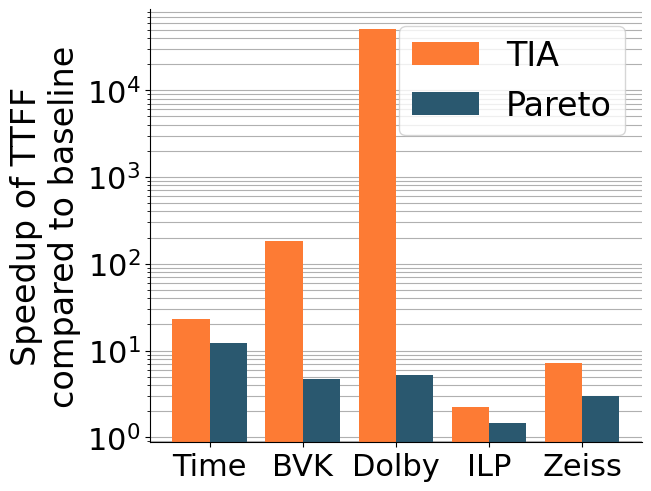

In [141]:
labels = ("Time", "BVK", "Dolby", "ILP", "Zeiss")

ttff = {
    'TIA': (1329311/57148, 5363429/29067, 3850078/76, 2393554/1066884, 47042/6471),
    'Pareto': (1329311/109261, 5363429/1151051, 3850078/731703, 2393554/1619752, 47042/15828)
}

colors = {
    'TIA': orange_color,
    'Pareto': blue_color
}

double_barchart(ttff, labels, "rq2-3-ttff-speedup-all.pdf", colors, "Speedup of TTFF\ncompared to baseline", False, "best", "log")


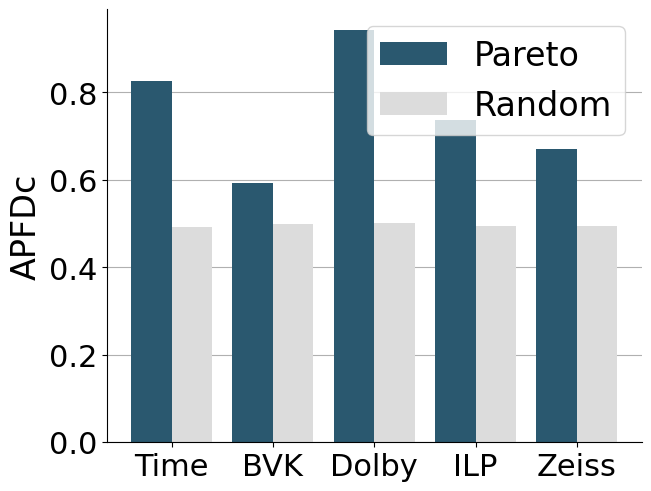

In [142]:
labels = ("Time", "BVK", "Dolby", "ILP", "Zeiss")

apfdc = {
    'Pareto': (0.827, 0.593, 0.943, 0.736, 0.670),
    'Random': (0.493, 0.500, 0.501, 0.494, 0.495)
}

colors = {
    'Pareto': blue_color,
    'Random': 'gainsboro'
}

double_barchart(apfdc, labels, "rq2-3-apfcd-all.pdf", colors, "APFDc", False, "best")